# Libraries and data loading


In [161]:
install.packages("geojsonio", binary = TRUE)


  There is a binary version available but the source version is later:
          binary source needs_compilation
geojsonio  0.9.4 0.11.0             FALSE



installing the source package 'geojsonio'



In [177]:
library(geojsonio)

points <- geojson_read("C:/Users/laury/OneDrive/Documents/Documents/M2_DSS/Données_de_santé_M_LAMER/Data_cartes/carte_regions.geojson",  what = "sp")
points2 <- st_as_sf(points)
points2

code nom                        geometry                      
1  11   Île-de-France              MULTIPOLYGON (((1.922146 48...
2  24   Centre-Val de Loire        MULTIPOLYGON (((0.8148247 4...
3  27   Bourgogne-Franche-Comté    MULTIPOLYGON (((6.940542 47...
4  28   Normandie                  MULTIPOLYGON (((-1.11962 49...
5  32   Hauts-de-France            MULTIPOLYGON (((4.140894 49...
6  44   Grand Est                  MULTIPOLYGON (((3.414789 48...
7  52   Pays de la Loire           MULTIPOLYGON (((-2.304788 4...
8  53   Bretagne                   MULTIPOLYGON (((-2.123706 4...
9  75   Nouvelle-Aquitaine         MULTIPOLYGON (((-1.025739 4...
10 01   Guadeloupe                 MULTIPOLYGON (((-61.63356 1...
11 02   Martinique                 MULTIPOLYGON (((-61.20405 1...
12 03   Guyane                     MULTIPOLYGON (((-53.87043 5...
13 04   La Réunion                 MULTIPOLYGON (((55.25415 -2...
14 06   Mayotte                    MULTIPOLYGON (((45.04101 -1...
15 76   Occitanie                  MULTIPOLYGON (((1.78613 42....
16 84   Auvergne-Rhône-Alpes       MULTIPOLYGON (((3.361348 44...
17 93   Provence-Alpes-Côte d'Azur MULTIPOLYGON (((6.948333 44...
18 94   Corse                      MULTIPOLYGON (((9.271032 41...

In [188]:
areas <- st_read("C:/Users/laury/OneDrive/Documents/Documents/M2_DSS/Données_de_santé_M_LAMER/a-com2021-2154/a_com2021_2154.shp")

Reading layer `a_com2021_2154' from data source `C:\Users\laury\OneDrive\Documents\Documents\M2_DSS\DonnÃ©es_de_santÃ©_M_LAMER\a-com2021-2154\a_com2021_2154.shp' using driver `ESRI Shapefile'
Simple feature collection with 34965 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 84333.86 ymin: 6046255 xmax: 1242444 ymax: 7110479
Projected CRS: RGF93 / Lambert-93


In [189]:
head(points)

class       : SpatialPolygonsDataFrame 
features    : 6 
extent      : -1.947273, 8.230399, 46.15695, 51.08854  (xmin, xmax, ymin, ymax)
crs         : +proj=longlat +datum=WGS84 +no_defs 
variables   : 2
names       : code,                     nom 
min values  :   11, Bourgogne-Franche-Comté 
max values  :   44,               Normandie 

In [190]:
head(areas)

codgeo libgeo                  dep reg xcl2154 ycl2154
1 01001  L'Abergement-Clémenciat 01  84  848241  6563021
2 01002  L'Abergement-de-Varey   01  84  887495  6548152
3 01004  Ambérieu-en-Bugey       01  84  882724  6542583
4 01005  Ambérieux-en-Dombes     01  84  847277  6545791
5 01006  Ambléon                 01  84  902191  6519791
6 01007  Ambronay                01  84  882682  6548067
  geometry                      
1 MULTIPOLYGON (((846985.3 65...
2 MULTIPOLYGON (((886026.1 65...
3 MULTIPOLYGON (((884889.8 65...
4 MULTIPOLYGON (((845947 6547...
5 MULTIPOLYGON (((901335.5 65...
6 MULTIPOLYGON (((886026.1 65...

# Mapping

In [ ]:
areas <- st_transform(areas, 4326)
points2 <- st_transform(points2, 4326)

In [193]:
tm_shape(areas) + tm_polygons() +
  tm_shape(points2) + tm_dots(size = 1)

In [195]:
pipr <- st_join(points2, areas)
head(pipr)

although coordinates are longitude/latitude, st_intersects assumes that they are planar


code nom           codgeo libgeo                 dep reg xcl2154 ycl2154
1   11   Île-de-France 02084  Bézu-le-Guéry          02  32  716617  6878690
1.1 11   Île-de-France 02125  Brumetz                02  32  711728  6889108
1.2 11   Île-de-France 02163  Charly-sur-Marne       02  32  720812  6875081
1.3 11   Île-de-France 02242  Crouttes-sur-Marne     02  32  717511  6875611
1.4 11   Île-de-France 02339  Gandelu                02  32  713350  6888269
1.5 11   Île-de-France 02458  Dhuys et Morin-en-Brie 02  32  735536  6864893
    geometry                      
1   MULTIPOLYGON (((1.922146 48...
1.1 MULTIPOLYGON (((1.922146 48...
1.2 MULTIPOLYGON (((1.922146 48...
1.3 MULTIPOLYGON (((1.922146 48...
1.4 MULTIPOLYGON (((1.922146 48...
1.5 MULTIPOLYGON (((1.922146 48...

In [203]:
tm_shape(areas) + tm_polygons(col = "gray80") +
tm_shape(areas) + tm_polygons(col = "dep", style = "pretty", alpha = 0.8) +   
  tm_shape(points2) + tm_dots(size = 0.5) 

Warning message:
"Number of levels of the variable "dep" is 101, which is larger than max.categories (which is 30), so levels are combined. Set tmap_options(max.categories = 101) in the layer function to show all levels."

In [204]:
tm_shape(areas) + tm_polygons(col = "gray80") +
tm_shape(areas) + tm_polygons(col = "reg", style = "pretty", alpha = 0.8) +   
  tm_shape(points2) + tm_dots(size = 0.5) 

Warning message:
"Number of levels of the variable "dep" is 101, which is larger than max.categories (which is 30), so levels are combined. Set tmap_options(max.categories = 101) in the layer function to show all levels."

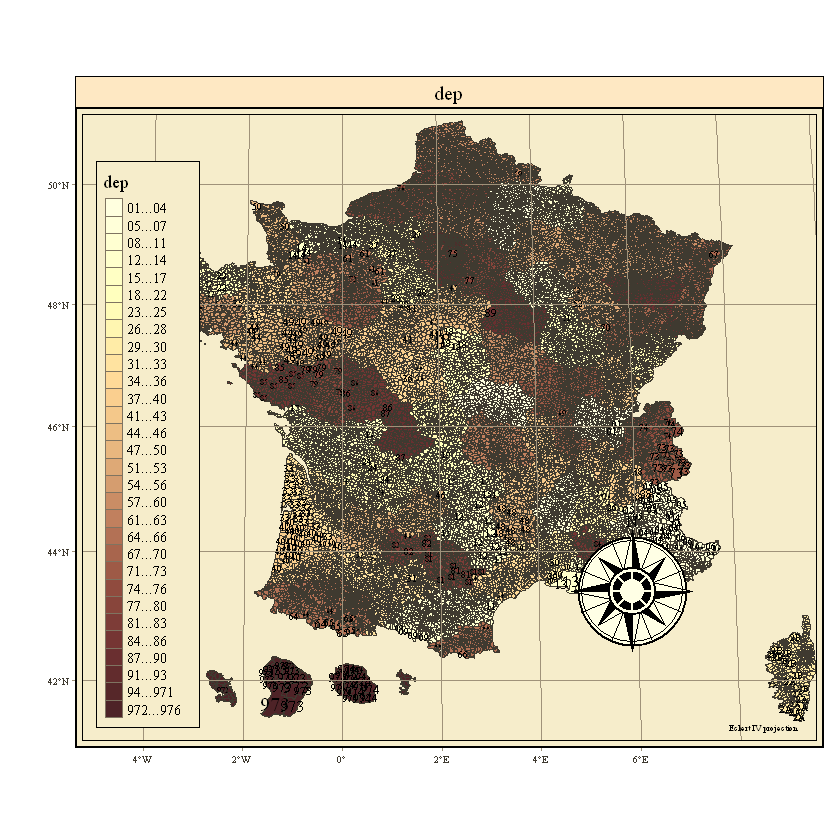

In [235]:
tm_shape(areas) +
tm_polygons("dep",palette="YlOrRd", breaks=c(0,25,50,100,200,+Inf)) +
tm_shape(areas, is.master=TRUE, projection = "+proj=eck4") + tm_borders("grey20") +
tm_text("dep",size="AREA") +
tm_graticules(labels.size = 0.5) +
tm_compass(position = c(.65, .15), color.light = "grey90") +
tm_credits("Eckert IV projection", position = c("right", "BOTTOM")) +
tm_style("classic") +
tm_layout(panel.labels="dep",bg.color="lightblue",
inner.margins=c(.04,.03, .02, .01), 
earth.boundary = TRUE, 
space.color="grey90",
legend.width = 0.8) +
tm_legend(position = c("left", "bottom"), 
frame = TRUE,
bg.color="lightblue")